[Referencia](https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python)

In [ ]:
!wget https://www.dropbox.com/s/u8xtf5177yl4p57/river.png?dl=0
!wget https://www.dropbox.com/s/nhpygf9qruwr1y3/flowers.jpg?dl=0

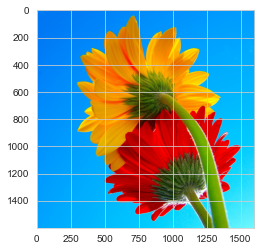

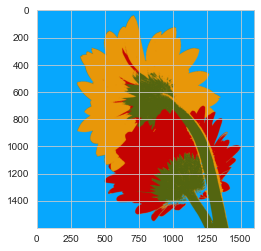

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

# read the image
#image = cv2.imread('river.png')
#k = 3 # numbers of clusters (K)
image = cv2.imread('flowers.jpg')
k = 4 # numbers of clusters (K)

# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

compactness, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

# convert all pixels to the color of the centroids
segmented_image = centers[labels]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)

# show the image
plt.imshow(segmented_image)
plt.show()



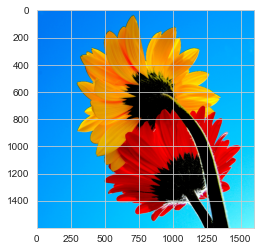

In [2]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 0
masked_image[labels == cluster] = [0, 0, 0]

# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
plt.show()